In [ ]:
!pip intsall ultralytics --upgrade


ERROR: unknown command "intsall" - maybe you meant "install"


In [ ]:
!pip install ultralytics --upgrade

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 53.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 107.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 81.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 51.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 12.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 6.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 35.2 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstalling

In [ ]:
from ultralytics import YOLO

import ultralytics
ultralytics.checks()

Ultralytics 8.3.160 🚀 Python-3.11.13 torch-2.6.0+cu124 CPU (Intel Xeon 2.20GHz)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 41.8/107.7 GB disk)


In [ ]:
from google.colab import files

# Upload any image you want to test
uploaded = files.upload()

# The uploaded image will now be available in Colab
# You can check the filename like this:
import os
image_path = list(uploaded.keys())[0]
print("Uploaded file:", image_path)

Saving nach.jpg to nach.jpg
Uploaded file: nach.jpg


In [ ]:
model = YOLO('yolov8n.pt')

100%|██████████| 6.25M/6.25M [00:00<00:00, 314MB/s]



image 1/1 /content/nach.jpg: 640x480 1 person, 1 chair, 573.4ms
Speed: 15.5ms preprocess, 573.4ms inference, 28.4ms postprocess per image at shape (1, 3, 640, 480)
Results saved to runs/detect/predict


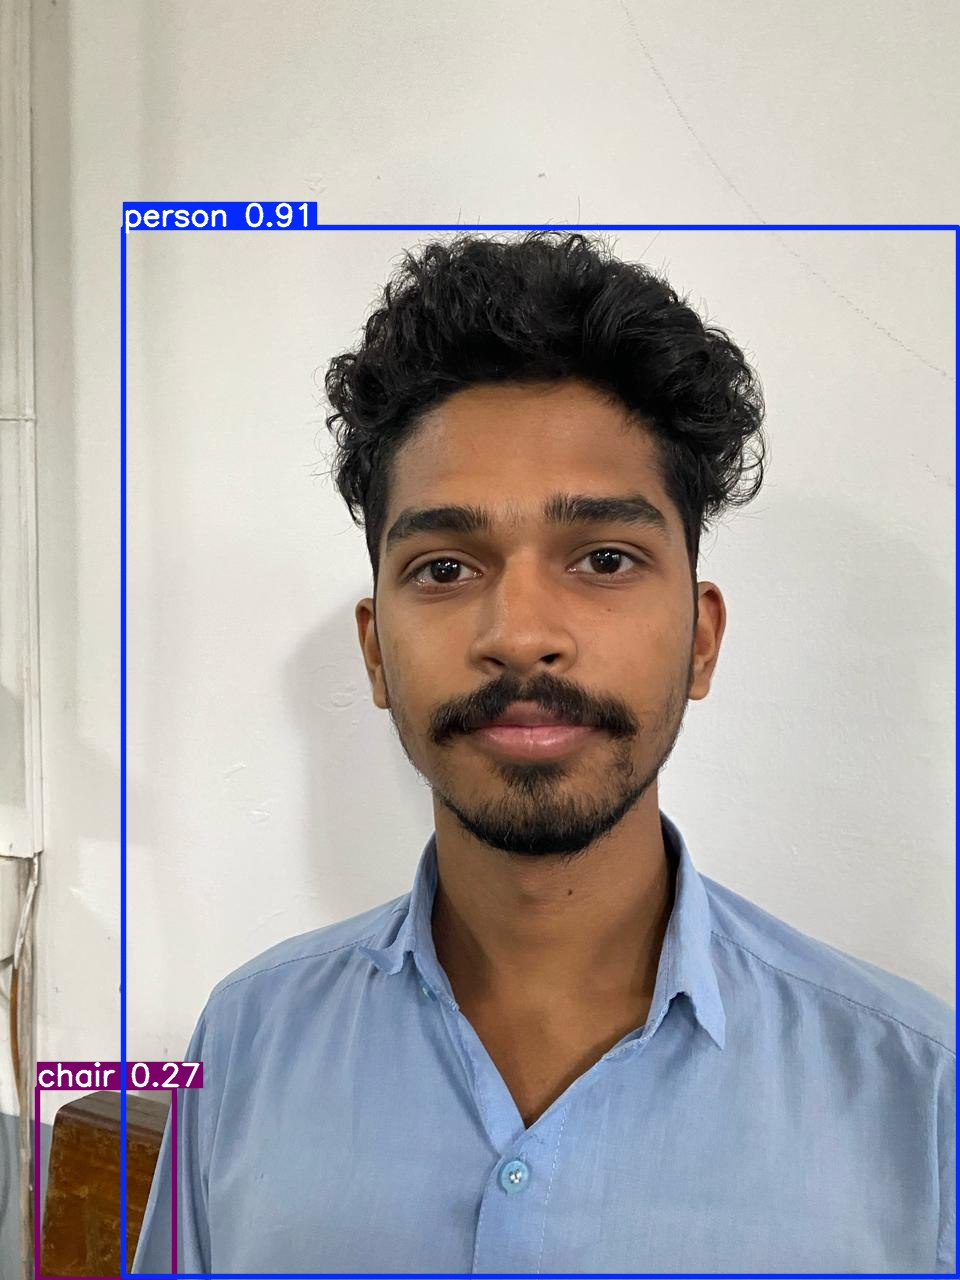

In [ ]:
model = YOLO('yolov8n.pt')

# Run prediction on the uploaded image
results = model.predict(source=image_path, save=True)

# Show prediction results (saved in 'runs/detect/predict/')
from IPython.display import Image
Image(filename='runs/detect/predict/' + os.path.basename(image_path))

In [ ]:
# Print class names, confidence scores, and bounding box coordinates
for r in results:
    boxes = r.boxes
    for box in boxes:
        cls_id = int(box.cls)  # class index
        cls_name = model.names[cls_id]  # class name
        confidence = float(box.conf)  # confidence score
        coords = box.xyxy.tolist()  # box coordinates
        print(f"Class: {cls_name}, Confidence: {confidence:.2f}, Box Coordinates: {coords}")

Class: person, Confidence: 0.91, Box Coordinates: [[123.30621337890625, 227.262939453125, 958.2710571289062, 1276.682373046875]]
Class: chair, Confidence: 0.27, Box Coordinates: [[37.52325439453125, 1087.16943359375, 174.02499389648438, 1279.267578125]]


In [ ]:
from google.colab import files
files.download('runs/detect/predict/' + os.path.basename(image_path))

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>